### 다중 선형회귀 - 보스톤 주택 가격

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

- 데이터 탐색

In [5]:
df = pd.read_csv('data/Boston_house.csv')
df.shape

(506, 14)

In [6]:
df.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


- feature 별 산점도와 선형회귀선

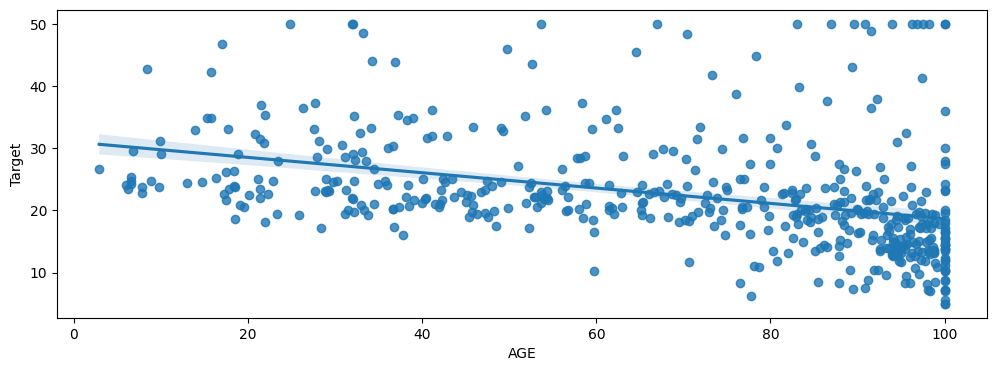

In [11]:
plt.figure(figsize=(12,4))
sns.regplot(x='AGE',y='Target',data=df);

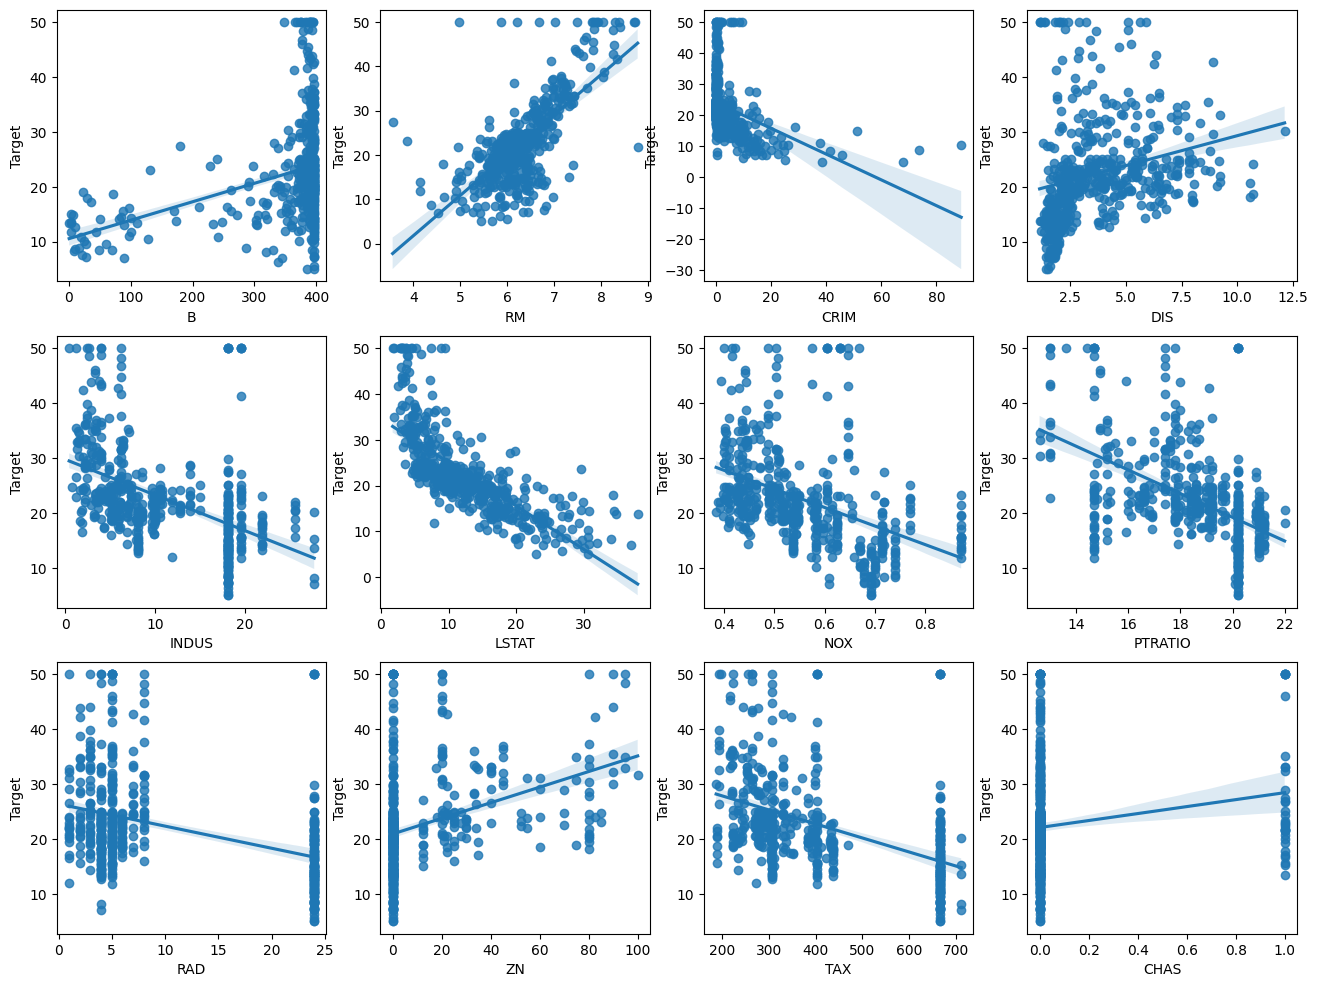

In [16]:
fig,axs = plt.subplots(3,4,figsize=(16,12))
for i, feature in enumerate(df.columns[1:-1]):
    row,col = i//4,i%4
    sns.regplot(x=feature,y='Target',data=df,ax=axs[row][col])

In [15]:
from sklearn.linear_model import LinearRegression
for feature in df.columns[:-1]:
    lr = LinearRegression()
    X = df[feature].values.reshape(-1,1)
    lr.fit(X,df.Target.values)
    score = lr.score(X,df.Target.values)
    print(f'{feature}:{score:.4f}')

AGE:0.1421
B:0.1112
RM:0.4835
CRIM:0.1508
DIS:0.0625
INDUS:0.2340
LSTAT:0.5441
NOX:0.1826
PTRATIO:0.2578
RAD:0.1456
ZN:0.1299
TAX:0.2195
CHAS:0.0307


In [17]:
# 다중 선형회귀
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,:-1].values,df.Target.values,test_size=0.1,random_state=2023
)

In [18]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [19]:
# 결정 계수 (R Squared)
lr.score(X_test, y_test)

0.7271717469533648

In [20]:
# 가중치
lr.coef_

array([-1.10277063e-03,  7.58599968e-03,  3.87404592e+00, -1.08509288e-01,
       -1.47219747e+00,  2.93056817e-02, -5.45214900e-01, -1.77344364e+01,
       -8.96196130e-01,  2.79148815e-01,  4.73634512e-02, -1.16000238e-02,
        2.88757692e+00])

In [21]:
# bias
lr.intercept_

35.78228139597018

- 회귀식    
    - Target = 0.0011 * AGE + 0.0076 * B + 3.87 * RM + ..... + 2.887 * CHAS + 35.7822

- 테스트 데이터에 적용

In [22]:
X_test[0], y_test[0]

(array([ 95.3    , 319.98   ,   6.006  ,   7.02259,   1.8746 ,  18.1    ,
         15.7    ,   0.718  ,  20.2    ,  24.     ,   0.     , 666.     ,
          0.     ]),
 14.2)

In [23]:
# weight와 bias를 이용해서 직접 계산
np.dot(lr.coef_,X_test[0])+lr.intercept_

17.958305169593746

In [25]:
# predict() method 사용
lr.predict(X_test[0].reshape(1,-1))[0]

17.958305169593746

In [27]:
# 10개 테스트 데이터에 적용
pred = lr.predict(X_test)
for i in range(10):
    print(f'실제 값 : {y_test[i]},\t 예측 값 : {pred[i]:.4f}')

실제 값 : 14.2,	 예측 값 : 17.9583
실제 값 : 15.6,	 예측 값 : 15.6069
실제 값 : 23.7,	 예측 값 : 27.4749
실제 값 : 20.4,	 예측 값 : 19.7022
실제 값 : 23.1,	 예측 값 : 24.9588
실제 값 : 50.0,	 예측 값 : 40.8837
실제 값 : 23.2,	 예측 값 : 22.2554
실제 값 : 36.0,	 예측 값 : 36.1518
실제 값 : 17.1,	 예측 값 : 19.5734
실제 값 : 14.1,	 예측 값 : 16.1215


##### 회귀는 꼭 선형 회귀이어야 하는가?

- SVR

In [28]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

In [29]:
svr = SVR()
svr.fit(X_train,y_train)
pred_sv = svr.predict(X_test)

In [30]:
r2_sv = r2_score(y_test,pred_sv)
mse_sv = mean_squared_error(y_test,pred_sv)

- RandomForest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2023)
rfr.fit(X_train,y_train)
pred_rf = rfr.predict(X_test)
r2_rf = r2_score(y_test,pred_rf)
mse_rf = mean_squared_error(y_test,pred_rf)

- XGBosst

In [32]:
from xgboost import XGBRegressor
xgr = XGBRegressor()
xgr.fit(X_train,y_train)
pred_xg = xgr.predict(X_test)
r2_xg = r2_score(y_test,pred_xg)
mse_xg = mean_squared_error(y_test,pred_xg)

- Linear Regressor

In [33]:
pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test,pred_lr)
mse_lr = mean_squared_error(y_test,pred_lr)

- 비교

In [36]:
print('\t\tLR\tSVR\tRF\tXG')
print(f'R squared\t{r2_lr:.4f}\t{r2_sv:.4f}\t{r2_rf:.4f}\t{r2_xg:.4f}')
print(f'Mean squared E\t{mse_lr:.4f}\t{mse_sv:.4f}\t{mse_rf:.4f}\t{mse_xg:.4f}')

		LR	SVR	RF	XG
R squared	0.7272	0.2042	0.8654	0.8787
Mean squared E	18.3886	53.6350	9.0700	8.1727


In [37]:
df = pd.DataFrame({
    'Y':y_test,'LR':pred_lr,'SVR':pred_sv, 'RF':pred_rf,'XG':pred_xg
})
df.head(10)

,Y,LR,SVR,RF,XG
0,14.2,17.958305,15.017989,15.430,14.725801
1,15.6,15.606944,21.968696,16.820,15.861876
2,23.7,27.474924,23.817999,24.539,27.065056
3,20.4,19.702224,22.621478,19.720,19.290201
4,23.1,24.958797,23.143946,23.892,23.544884
5,50.0,40.883669,19.982511,47.424,52.144672
6,23.2,22.255425,15.991492,19.329,19.173691
7,36.0,36.151795,22.930248,36.021,34.340393
8,17.1,19.573404,19.179914,18.546,18.095255
9,14.1,16.121493,13.387749,15.023,14.961949


##### 규제 선형회귀

- Ridge - L2 규제

In [39]:
from sklearn.linear_model import Ridge
ridge = Ridge(random_state=2023)
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': 2023,
 'solver': 'auto',
 'tol': 0.0001}

In [40]:
ridge.fit(X_train,y_train)
pred_rg = ridge.predict(X_test)
r2_rg = r2_score(y_test,pred_rg)
mse_rg = mean_squared_error(y_test,pred_rg)

In [41]:
r2_rg, mse_rg

(0.7247569398981952, 18.551363202899005)

- Lasso - L1 규제

In [42]:
from sklearn.linear_model import Lasso
lasso = Lasso(random_state=2023)
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': 2023,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [43]:
lasso.fit(X_train,y_train)
pred_ls = lasso.predict(X_test)
r2_ls = r2_score(y_test,pred_ls)
mse_ls = mean_squared_error(y_test,pred_ls)

In [44]:
r2_ls, mse_ls

(0.6758523078239078, 21.847532020302374)

- 종합 비교

In [45]:
print('\t\tLR\tSVR\tRF\tXG\tRidge\tLasso')
print(f'R squared\t{r2_lr:.4f}\t{r2_sv:.4f}\t{r2_rf:.4f}\t{r2_xg:.4f}\t{r2_rg:.4f}\t{r2_ls:.4f}')
print(f'Mean squared E\t{mse_lr:.4f}\t{mse_sv:.4f}\t{mse_rf:.4f}\t{mse_xg:.4f}\t{mse_rg:.4f}\t{mse_ls:.4f}')

		LR	SVR	RF	XG	Ridge	Lasso
R squared	0.7272	0.2042	0.8654	0.8787	0.7248	0.6759
Mean squared E	18.3886	53.6350	9.0700	8.1727	18.5514	21.8475


In [46]:
df['Ridge'] = pred_rg
df['Lasso'] = pred_ls
df.head(10)

,Y,LR,SVR,RF,XG,Ridge,Lasso
0,14.2,17.958305,15.017989,15.430,14.725801,18.282171,19.242233
1,15.6,15.606944,21.968696,16.820,15.861876,15.802795,17.764299
2,23.7,27.474924,23.817999,24.539,27.065056,27.554811,28.284153
3,20.4,19.702224,22.621478,19.720,19.290201,20.222149,23.162536
4,23.1,24.958797,23.143946,23.892,23.544884,25.112457,26.171419
5,50.0,40.883669,19.982511,47.424,52.144672,40.406442,35.421685
6,23.2,22.255425,15.991492,19.329,19.173691,21.847296,20.431429
7,36.0,36.151795,22.930248,36.021,34.340393,36.478912,34.682434
8,17.1,19.573404,19.179914,18.546,18.095255,19.616287,19.385382
9,14.1,16.121493,13.387749,15.023,14.961949,16.428536,15.824913
